## CS559 Summer21 Final Exam. (110 pts)
### Due: August 24$^{th}$ Tuesday 6 PM
### Exam Period: Three hours

- **Late Submission Penalty**: Within the exam period, you are allowed to take the exam at any time at your convenience. However, the exam must be submitted within <u>**two hours**</u> from the exam starting time. Any late submissions will be penalized - **5 points for every 5 minutes.**
- **Required File Submission**: Students must submit the exam in two formats - ***HTML*** and ***notebook***. <u>**If either file is missing, the exam will not be graded.**</u> Before the submission, please execute all codes in notebook.  
- **Open Notes and Resource Usability**: Students may use the previous demonstration files provided in class and the lecture notes or textbooks. The use of the internet is prohibited. <u>**Any evidence of cheating or copying from outside resources will mark 0 on the final exam.**</u>
- **Library Use**: You can use any built-in functions and libraries if the descriptions are not specified - some questions may require specific functions and libraries. 

### 1. Probability Theory: (15 pts)
##### Work on notebook and provide answers in dataframes.
This is a pure computation problem. You do not have use any built-in statistical functions and rather can just solve numerically. Please do not just provide answers. 

A grocery store sells apples from 3 different countries (country A, country B, and country C). All the apples from country A are sweet, while 60% of the apples from country B are sweet, and 40% of the apples from country C are sweet. Unfortunately, the sign in the grocery store that would normally indicate where the apples are from is missing. Nevertheless, you buy a bag of apples. Before tasting any apple, you believe that they are from country A with probability 0.6, country B with probability 0.3 and country C with probability 0.25. After tasting 6 apples, you noticed that 4 of them are sweet and 2 of them are not sweet.

#### 1-a: Bayesian learning: what is your posterior belief (after tasting the 6 apples mentioned above) that the apples are from each country? Find the prior, the likelihood, the unnormalized posterior, and the normalized posterior. (8 pts)

In [5]:
import numpy as np
## Type Priors
PrA= .6
PrB= .3
PrC= .25

## Type likelihood
LiA=1
LiB=.6
LiC=.4

In [275]:
## Calculate Unnormalized Posterior
UnNormA=(15)*1*0
UnNormB=(15) * .3**4 * .7**2
UnNormC=(15) * .25**4 * .75**2

psweet = 0*.6+UnNormB*.3+UnNormC*.25
## Calculate Normalized Posterior
NormA=UnNormA*.6/psweet
NormB=UnNormB*.3/psweet
NormC=UnNormC*.25/psweet

In [276]:
AnswerA={'Country':['A','B','C'],'Prior':[PrA, PrB, PrC],'Likelihood':[LiA,LiB,LiC],
         'Unnormalized Posterior':[UnNormA,UnNormB,UnNormC],'Normalized Posterior':[NormA,NormB,NormC]}
print(AnswerA)

{'Country': ['A', 'B', 'C'], 'Prior': [0.6, 0.3, 0.25], 'Likelihood': [1, 0.6, 0.4], 'Unnormalized Posterior': [0, 0.05953499999999999, 0.032958984375], 'Normalized Posterior': [0.0, 0.6843038926087712, 0.31569610739122883]}


#### 1-b: What is the probability that the next apple that you will taste is sweet according to the Bayesian learning prediction $Pr(Sweet|4sweets,1\sim sweet)$? (7 pts)

In [277]:
#P(sweet | A) * P(A | 4 sweet, 1 unsweet) + P(sweet|B) * P(B|4 sweet, 1 unsweet) + P(sweet|C) * P(C | 4 sweet, 1 unsweet)
ProbB=1*NormA+.6*NormB+.4*NormC
print(ProbB)

0.5368607785217543


### 2. Probabilitic Classification [25 pts]

2-a: Consider the following dataset. The input space has one dimension and there are two classes (+ and -): (0,+), (1,+), (0.9,+), (0.5,+), (1.5, -), (0.7, -), (1.2, -), (0.95,-).  Suppose that we are training a mixture of Gaussians model by maximum likelihood. In computations, use "P" for + and "M" for - classes. DO NOT USE ANY BUILT-IN FUNCTIONS. 
- What are the prior probabilities of each class Pr(+) and Pr(-)? [2pts]
- What is the mean of the conditional distribution of each class and what is the variance (assuming that both class conditional distributions have the same variance)? [3 pts]
- What is the probability $Pr(+|0.8)$? [5 pts]

In [14]:
### Prior Probability Computation:
PrP=.5
PrM=.5

### Compute mean of each class:
meanP=(0+1+.9+.5)/4
meanM=(1.5+.7+1.2+.95)/4

### Compute variance of each class:
varP=((0-meanP)**2+(1-meanP)**2+(.9-meanP)**2+(.5-meanP)**2)/(4-1)
varM=((1.5-meanM)**2+(.7-meanM)**2+(1.2-meanM)**2+(.95-meanM)**2)/(4-1)

### Compute variance
meanT = (meanP+meanM)/2
variance=((0-meanT)**2+(1-meanT)**2+(.9-meanT)**2+(.5-meanT)**2+
         (1.5-meanT)**2+(.7-meanT)**2+(1.2-meanT)**2+(.95-meanT)**2)/(8-1)

#P(+|.8) = P(.8|+)P(+)/P(.8)

In [15]:
Answer={'Class':['+','-'],'Prior':[PrP, PrM],'Mean':[meanP,meanM],'Variance':[varP,varM]}
Answer

{'Class': ['+', '-'],
 'Prior': [0.5, 0.5],
 'Mean': [0.6, 1.0875000000000001],
 'Variance': [0.2066666666666667, 0.11729166666666668]}

In [16]:
print("Variance is",variance)

Variance is 0.20674107142857143


2-b: Suppose that you trained a linear classification model on some training data and the resulting weights are $w_0=1$,$w_1=2$,$w_3=-3$. Assuming two classes (+ and -), a data point is predicted to belong to class + when $\sigma(w^T x+w_0 )\ge0.8$. Implement a function `my_class` that classifies the following data points - $(2,1)^T$, $(1,2)^T$, and $(0.5,-1)^T$ - and report the class of each point. `my_class` is a function that classifies individual point. You can use simple math functions but not *ML* algorithms, e.g., Logistic Regression, SVM, etc. [10 pts] 

In [267]:
import math
def my_class(x,w):
    z = w[1]*x[0]+w[2]*x[1] + w[0]
    ans = 1 / (1 + math.exp(-z))
    print(ans)
    if ans >= 0.8:
        return '+'
    return '-'

In [268]:
## Use my_class to verifty the class of each point
w=np.array([1,2,-3])
print(w)

b1=my_class(np.array([2,1]),w)
b2=my_class([1,2],w)
b3=my_class([.5,-1],w)

[ 1  2 -3]
0.8807970779778823
0.04742587317756678
0.9933071490757153


In [270]:
Answer={'Points':['(2,1)','(1,2)','(0.5,-1)'],'Class':[b1,b2,b3]}

In [271]:
Answer

{'Points': ['(2,1)', '(1,2)', '(0.5,-1'], 'Class': ['+', '-', '+']}

2-c: Consider the following data set:

|x|y|
|---------|----|
|(1,2)|+|
|(-1,-1)|+|
|(0,2)|-|
|(1,0)|-|

where the first two points belong to class + and the last two points belong to class −. Is it possible for a logistic regression classifier to correctly classify all points in this dataset? If yes, give weights that ensure correct classification? If no, explain why and describe an approach that could be used to modify the logistic regression classifier to correctly classify all those data points? [5 pts]

In [ ]:
#Answer Here: NO the data is not linearly seperable because any line that groups the positive values will have one negative
# on either side. Youd need to transform the data using a nonlinear mapping into a new plane where it would be linearly
#separable

### 3. Maximum Likelihood Estimation and Gradient Descent [25 pts]
3-a: Consider a data set in which each data point $t_n$ is associated with a weighting factor $r_n>0$, so that the sum-of-squares error function becomes 

$$E_D(\vec{w})=\frac{1}{2}\sum_{n=1}^Nr_n(t_n-\vec{w}^T\vec{x}_n)^2.$$
Using the provided data `Q3_a.csv`, compute the solution $w^*$ that minimizes this error function when $r_n=1$. You can use numpy. [8 pts] 


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
Q3 = pd.read_csv('./Q3_a.csv')
Q3.head(5)

,x,t
0,3.421417,17.543762
1,3.426875,17.200615
2,3.427060,17.556409
3,3.433556,17.471299
4,3.441630,17.510311


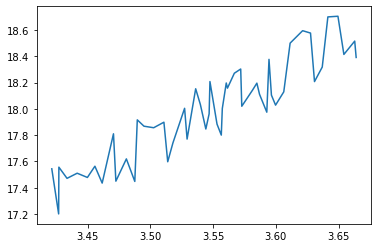

In [125]:
plt.plot(Q3['x'],Q3['t'])
plt.show()

In [128]:
Q3['xt']=Q3['x']*Q3['t']
Q3['xx']=np.matmul(Q3['x'],np.transpose(Q3['x']))
w=Q3['xt'].sum()/Q3['xx'].sum()
w

0.09946900955879749

3-b: Use `LinearRegression()` to confirm your answer from 3-a. You do not need to split the data. Train the model and determine $w^*$. [5 pts]

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
lr = LinearRegression(fit_intercept = False)

In [135]:
X = np.array(list(zip(Q3["x"])))
y = np.array(list(zip(Q3["t"])))
lr.fit(X,y)

LinearRegression(fit_intercept=False)

In [137]:
lr.score(X,y)

0.8167677280562933

3-b: Load `Q3_b.csv`. This is a polynomial function $t(x)$.
Implement a function that finds maximum $t$ using gradient descent idea. Keep in mind that gradient descent finds a local minimum of a differentiable function by taking repeated steps in the opposite direction of the apporximate gradient of the function at the current point. If the stepping takes in the direction of gradient, it will lead to a local maximum of that function. This procedure is known as **gradient ascent**.
You can use `np.polyfit(x,y,degree)[i]`, where $i$ is an integer, to find the coefficients. [12 pts]

In [139]:
Q3b = pd.read_csv('./Q3_b.csv')

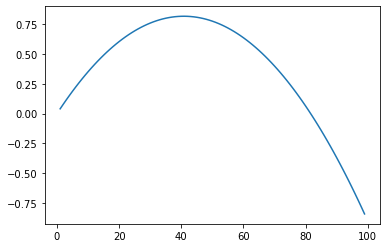

In [141]:
plt.plot(Q3b['x'],Q3b['t'])
plt.show()

In [163]:
X = np.array(list(Q3b["x"]))
y = np.array(list(zip(Q3b["t"])))
fit = np.polyfit(X,y,2)
fit[2,0]

-1.155020449622058e-15

In [260]:
def find_max_t():
    xmax=0
    tmax=0
    #.812 .818
    for x in np.arange(40.812,40.818,.00001):
        gradient = fit[0,0]*x**2+fit[1,0]*x+fit[2,0]
        if(gradient>tmax):
            tmax=gradient
            xmax=x+40
    
    print(xmax,tmax)
find_max_t()

80.81633000000137 0.8163265306122385


### 4. Data Preprocessing. (10 pts)
This question involves data preprocessing that needs to be done before modeling. The data comes from a global company, including orders from 2012 to 2015. Import the dataset `Orders.csv`.

4-a. Check `Profit` and `Sales` in the dataset, convert these two columns to numeric type and name them `New Profit` and "New Sales", respectively. (5 pts)

In [169]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [170]:
order_data = pd.read_csv('Orders.csv')
order_data.columns = order_data.columns.str.lower()
order_data.head()

,row.id,order.id,order.date,ship.date,ship.mode,customer.id,customer.name,segment,postal.code,city,...,product.id,category,sub.category,product.name,sales,quantity,discount,profit,shipping.cost,order.priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [176]:
order_data["new_profit"]=order_data["profit"].replace(['\$','\,'],'',regex=True).astype(float)
order_data["new_sales"]=order_data["sales"].replace(['\$','\,'],'',regex=True).astype(float)
order_data

,row.id,order.id,order.date,ship.date,ship.mode,customer.id,customer.name,segment,postal.code,city,...,sub.category,product.name,sales,quantity,discount,profit,shipping.cost,order.priority,new_profit,new_sales
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.770,High,62.15,221.98
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.630,Critical,-288.77,3709.40
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.490,Medium,919.97,5175.17
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.160,Medium,-96.54,2892.51
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.040,Critical,311.52,2832.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6/19/15,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",$65.10,5,0.0,$4.50,1.010,Medium,4.50,65.10
51286,34337,US-2014-ZD21925140-41765,5/6/14,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",$16.72,5,0.2,$3.34,1.930,High,3.34,16.72
51287,31315,CA-2012-ZD21925140-41147,8/26/12,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,Art,Newell 341,$8.56,2,0.0,$2.48,1.580,High,2.48,8.56
51288,9596,MX-2013-RB1979518-41322,2/17/13,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,Binders,"Acco Index Tab, Economy",$13.44,2,0.0,$2.40,1.003,Medium,2.40,13.44


In [177]:
order_data[['profit','new_profit','sales','new_sales']].head(5)

,profit,new_profit,sales,new_sales
0,$62.15,62.15,$221.98,221.98
1,-$288.77,-288.77,"$3,709.40",3709.40
2,$919.97,919.97,"$5,175.17",5175.17
3,-$96.54,-96.54,"$2,892.51",2892.51
4,$311.52,311.52,"$2,832.96",2832.96


4-b. Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year’s inventory. He wants you to answer the following questions: (5 pts)
- Is there any seasonal sales trend in your company?
- Is there any seasonal trend of different categories of products?

In [213]:
date = pd.to_datetime(order_data['order.date'])
year = list()
for i in range(len(order_data)):
    year.append(date[i].year)
order_data['year'] = year
month = list()
for i in range(len(order_data)):
    month.append(date[i].month)
order_data['month'] = month
season = list()
for i in range(len(order_data)):
    season.append((month[i]-1)//3)
order_data['season'] = season

In [214]:
order_data

,row.id,order.id,order.date,ship.date,ship.mode,customer.id,customer.name,segment,postal.code,city,...,quantity,discount,profit,shipping.cost,order.priority,new_profit,new_sales,year,month,season
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.0,$62.15,40.770,High,62.15,221.98,2014,11,3
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,9,0.1,-$288.77,923.630,Critical,-288.77,3709.40,2014,2,0
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,9,0.1,$919.97,915.490,Medium,919.97,5175.17,2014,10,3
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,5,0.1,-$96.54,910.160,Medium,-96.54,2892.51,2014,1,0
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,8,0.0,$311.52,903.040,Critical,311.52,2832.96,2014,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6/19/15,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,5,0.0,$4.50,1.010,Medium,4.50,65.10,2015,6,1
51286,34337,US-2014-ZD21925140-41765,5/6/14,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,5,0.2,$3.34,1.930,High,3.34,16.72,2014,5,1
51287,31315,CA-2012-ZD21925140-41147,8/26/12,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,2,0.0,$2.48,1.580,High,2.48,8.56,2012,8,2
51288,9596,MX-2013-RB1979518-41322,2/17/13,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,2,0.0,$2.40,1.003,Medium,2.40,13.44,2013,2,0


(array([26691.,     0.,     0., 41671.,     0.,     0., 49121.,     0.,
            0., 60829.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

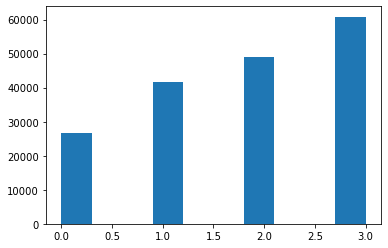

In [215]:
from matplotlib.pyplot import hist

hist(order_data.season, weights=order_data.quantity)

Yes there seems to be a higher quantity of sales as the months get later and later in the year. 

### 5. Classification Problem. (25 pts)
In this problem, the task is to classify using a given data set, `Data1_Class.csv`, with two features, $X$ and $Y$, and class labels. 

In [216]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [217]:
Data1=pd.read_csv('Data1_Class.csv')

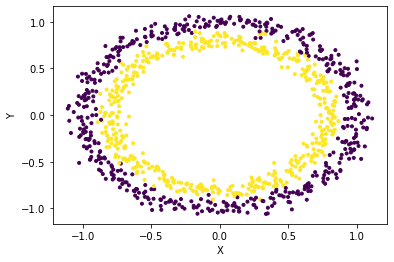

In [218]:
plt.scatter(Data1['X'], Data1['Y'], c=Data1['Class'], marker = '.') 
plt.ylabel('Y')
plt.xlabel('X')
plt.show() 

5-a: From the visual inspection above, explain how you can make a classifier using **a linear algorithm** (e.g., perceptron, logistic regression, or SVC) without Kernel or dimension reduction. [2 pts]

Check based on x^2+y^2

5-b: Do EDA and feature engineering as you explained in 5-a and call the new dataframe as `Data1_training`. [10 pts]

In [226]:
Data1_training = Data1
Data1_training["x2y2"] = Data1["X"]**2+Data1["Y"]**2
Data1_training

,Unnamed: 0,Class,X,Y,x^2+y^2,x2y2
0,0,1,0.759596,0.338615,0.691647,0.691647
1,1,0,-0.054081,-1.015513,1.034192,1.034192
2,2,0,0.239503,0.969903,0.998073,0.998073
3,3,1,-0.873011,0.033360,0.763261,0.763261
4,4,1,-0.844087,-0.011398,0.712613,0.712613
...,...,...,...,...,...,...
995,995,0,-0.483807,-0.897388,1.039376,1.039376
996,996,0,-0.321947,0.975426,1.055107,1.055107
997,997,0,0.823918,0.544920,0.975779,0.975779
998,998,0,0.549605,0.900108,1.112260,1.112260


5-c: Using new `Data1_training`, perform the classification using Logistic Regression. [5 pts]

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [246]:
model1 = LogisticRegression()
X = np.array(list(zip(Data1_training["x2y2"])))
y = np.array(list(zip(Data1_training["Class"])))
model1.fit(X,y)

C:\Users\aughb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [250]:
pred = model1.predict(X)


In [251]:
score = model1.score(X,y)
score

0.979

5-d: How would you classify the label directly without any pre-processing? You are under the same condition as mentioned in 5-a. Explain. [3 pts]

The x^2 + y^2 transformation does not involve cleaning the data, so I believe that would still be applicable.

5-e: perform the classification as explained in 5-d. [5 pts]

In [252]:
model1 = LogisticRegression()
X = np.array(list(zip(Data1_training["x2y2"])))
y = np.array(list(zip(Data1_training["Class"])))
model1.fit(X,y)
score = model1.score(X,y)
score

C:\Users\aughb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.979

# 6 Short Answers [10 pts]

6-1: Is it always good to do cross-validation? Justify your answer with a case (e.g., number of features, data size, etc..) [2 pts]

Yes, cross validation ensures that each split of the data is a relatively good representation of the whole data and helps to reduce bias.

6-2: Is it necessary to remove outliers if you are going to predict a target using tree-based algorithms? Explain why. [2 pts]

No, trees divide based on based on values that best distinguish one class from another. It doesnt matter how far away one value is from the split, it just matters which class it falls into.

6-3: Your friend has trained a classifier using any algorithms and got 100% accuracy. However, when you tested the model with a new data set with the same size and features, your testing accuracy dropped to 30%. What would you check from your friend's work? Explain why. Please do not say about EDA or feature engineering. [2 pts]

I would check to see if my friend is using the training data for predictions instead of the test data. The model was trained off of the training data and so using the same training data for predictions artificially inflate the accuracy. This would also explain why new data's accuracy was at 30% because the model was overfitted specifically to the training data.

6-4: You are told to train a model using Linear Regression, Random Forest, and SVM to predict a target. The data has 1000 observations and 40 columns, including the target. Among three algorithms, which one would be the preferable algorithm to use if you have given 10 minutes? Assume that you have not done any pre-processing data work. Explain why. [2 pts]

I would choose either Linear Regression as it is much faster than Random Forest and SVM for large datasets. SVM training complexity gets very high with large data, and 40 features would make random forest much slower needing to split based on one feature at a time for any high depths.

6-10: Explain why machine learning is "Garbage IN Garbage OUT"? [2 pts]

Garbage data yields garbage results. If you train your model on bad data, then the model will not accurately represent what you are trying to represent. Giving that garbage model good data will yield very inaccurate results. Alternatively, if you have a good model and then give it garbage input data, it will not be able to interpret the data accurately and thus will still yield inaccurate results.